In [120]:
import numpy as np
import matplotlib.pyplot as plt

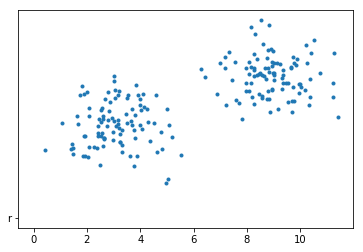

In [121]:
x1 = np.random.normal((3,4),1,(100,2))
y1 = np.ones(100).reshape(100,1)
x1 = np.column_stack((x1,y1))
x2 = np.random.normal((9,6),1,(100,2))
y2 = np.zeros(100).reshape(100,1)
x2 = np.column_stack((x2,y2))
x = np.row_stack((x1,x2))
np.random.shuffle(x)
plt.plot(x[:,0],x[:,1],'.','r')


In [122]:
d = x.shape[1]-1           #  d 表示数据维度
y = np.mat(x[:,-1]).copy().T    #  y 表示数据集中，输出数据
X = np.mat(x).copy()            #  x 表示数据集中，输入数据
X[:,-1] = 1
w0 = np.mat(np.ones(3)-0.5).reshape(3,1)
X.shape , y.shape,  w0.shape

((200, 3), (200, 1), (3, 1))

In [202]:
def GradDesc(gX,gy,gw,alpha=1e-2):
    xtw = gX * gw   #(200,1)
    h = 1 / (1 + np.exp(-xtw))
    cost1 = - gy.T * np.log(h)  #(1,200)*(200,1) = (1)    
    cost2 = - (gy.T - 1) * np.log(1 - h) #(1,200)*(200,1) = (1)    
    m = len(gy)
    J0= (cost1 + cost2) / m
    GD = ((h - y).T * x).T   #(200,1).T * (200,3) = (1,3), 在取T后为 (3,1)
    r_w = gw - alpha * GD
    xtw1 = gX * r_w
    h1 = 1 / (1 + np.exp( -xtw1 ))
    J = (- gy.T * np.log(h1) - (gy.T - 1) * np.log(1 - h1)) / m
    #print('****',J,'****',r_w.T,'****')
    return J,r_w

In [203]:
JJ,ww = GradDesc(X,y,w0)
list_jj = []
list_jj.append(JJ)
ii = 0
while True:
    JJ,ww = GradDesc(X,y,ww)
    list_jj.append(JJ)   
    if np.abs(JJ)<=1e-5 : break



In [204]:
#plt.plot(x[:,0],x[:,1],'.','r')
r_h = 1 / (1 + np.exp(x * ww))
r_y = np.where(r_h<=0.5 , 1,0)
test = np.abs(r_y - y)
test.sum()/len(x)

0.005

In [ ]:
B0 = np.mat(np.ones(d+1)).reshape(d+1,1)             #B0 表示B的初始数据
                                                             #B的大小应该是维度加1的列向量，shape为（d+1 ， 1）
B = B0
print(B)
def LB_NT(Bf,xf,yf):  #牛顿法计算Bn
    P1 = (np.exp(Bf.T * x.T)/(np.exp(Bf.T * xf.T)+1)).T
    b1 = -xf.T * ( yf - P1)                                    #结果应为（3,1） 矩阵
    b21 = np.multiply(P1, (1-P1))                 #结果应为
    b22 = np.array([  xf[i].T * xf[i] * np.array(b21[i])[0][0]   for i in range(len(b21))])
    b2 = np.mat(b22.sum(0)) #结果为3*3方阵
    B_ = -b2.I * b1 + Bf
    LB = (np.log(np.exp(Bf.T * xf.T)+1)-  (Bf.T*xf.T) * yf).sum()
    print(LB ,B_.T)
    print()
    return B_,LB
for n in range(25):
    print(n)
    B,LB = LB_NT(B,x,y)


#LB = B.T * x.T * y+ np.log(np.exp(B.T * x.T) + 1).sum()